In [6]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

from model_main import load_all_dict
from model_main import spha_coefficients_from_conditions


In [7]:

'''Example usage of the function load_all_dict and spha_coefficients_from_conditions'''



#Define the three input parameters that initialize the model
solar_activity_input = 83  # Example solar activity input: Can be any value between 70 and 133
clock_angle_input = np.radians(30)  # Example clock angle input: Can be any value between 0 and 2*np.pi
season_input = 'Equinox'  # Example season: Has to be either 'Summer'or 'Equinox' or 'Winter'.

#Load the all the coefficients and assign them a specific name
alm_dict_N_ne, alm_dict_S_ne, alm_dict_N_gamma2, alm_dict_S_gamma2, alm_dict_N_rodi, alm_dict_S_rodi  = load_all_dict('spha_coeff/')


# Call the function to get the interpolated coefficient for the electron density map
interpolated_coef_N_ne = spha_coefficients_from_conditions(alm_dict_N_ne, solar_activity_input, clock_angle_input, season_input)
interpolated_coef_S_ne = spha_coefficients_from_conditions(alm_dict_S_ne, solar_activity_input, clock_angle_input, season_input)

# Call the function to get the interpolated coefficient for the gamma(2) map
interpolated_coef_N_gamma2 = spha_coefficients_from_conditions(alm_dict_N_gamma2, solar_activity_input, clock_angle_input, season_input)
interpolated_coef_S_gamma2 = spha_coefficients_from_conditions(alm_dict_S_gamma2, solar_activity_input, clock_angle_input, season_input)

# Call the function to get the interpolated coefficient for the RODI map
interpolated_coef_N_rodi = spha_coefficients_from_conditions(alm_dict_N_rodi, solar_activity_input, clock_angle_input, season_input)
interpolated_coef_S_rodi = spha_coefficients_from_conditions(alm_dict_S_rodi, solar_activity_input, clock_angle_input, season_input)


#Set fixed parameters to initialize the healpy library
nside = 32
lmax = 30
mmax = lmax


# Output the result
print("Interpolated Coefficient:", interpolated_coef_N_ne[:10])

reconstructed_map_N_ne = hp.alm2map(interpolated_coef_N_ne, nside=nside, lmax=lmax, mmax=mmax)
reconstructed_map_S_ne = hp.alm2map(interpolated_coef_S_ne, nside=nside, lmax=lmax, mmax=mmax)

reconstructed_map_N_gamma2 = hp.alm2map(interpolated_coef_N_gamma2, nside=nside, lmax=lmax, mmax=mmax)
reconstructed_map_S_gamma2 = hp.alm2map(interpolated_coef_S_gamma2, nside=nside, lmax=lmax, mmax=mmax)

reconstructed_map_N_rodi = hp.alm2map(interpolated_coef_N_rodi, nside=nside, lmax=lmax, mmax=mmax)
reconstructed_map_S_rodi = hp.alm2map(interpolated_coef_S_rodi, nside=nside, lmax=lmax, mmax=mmax)


Interpolated Coefficient: [ 56277.99126742+0.j  71627.35541937+0.j  43314.48433967+0.j
   1813.29979644+0.j -24550.72044356+0.j -24196.1464314 +0.j
  -5273.512416  +0.j  14523.44941305+0.j  21521.2531968 +0.j
  13704.02993638+0.j]


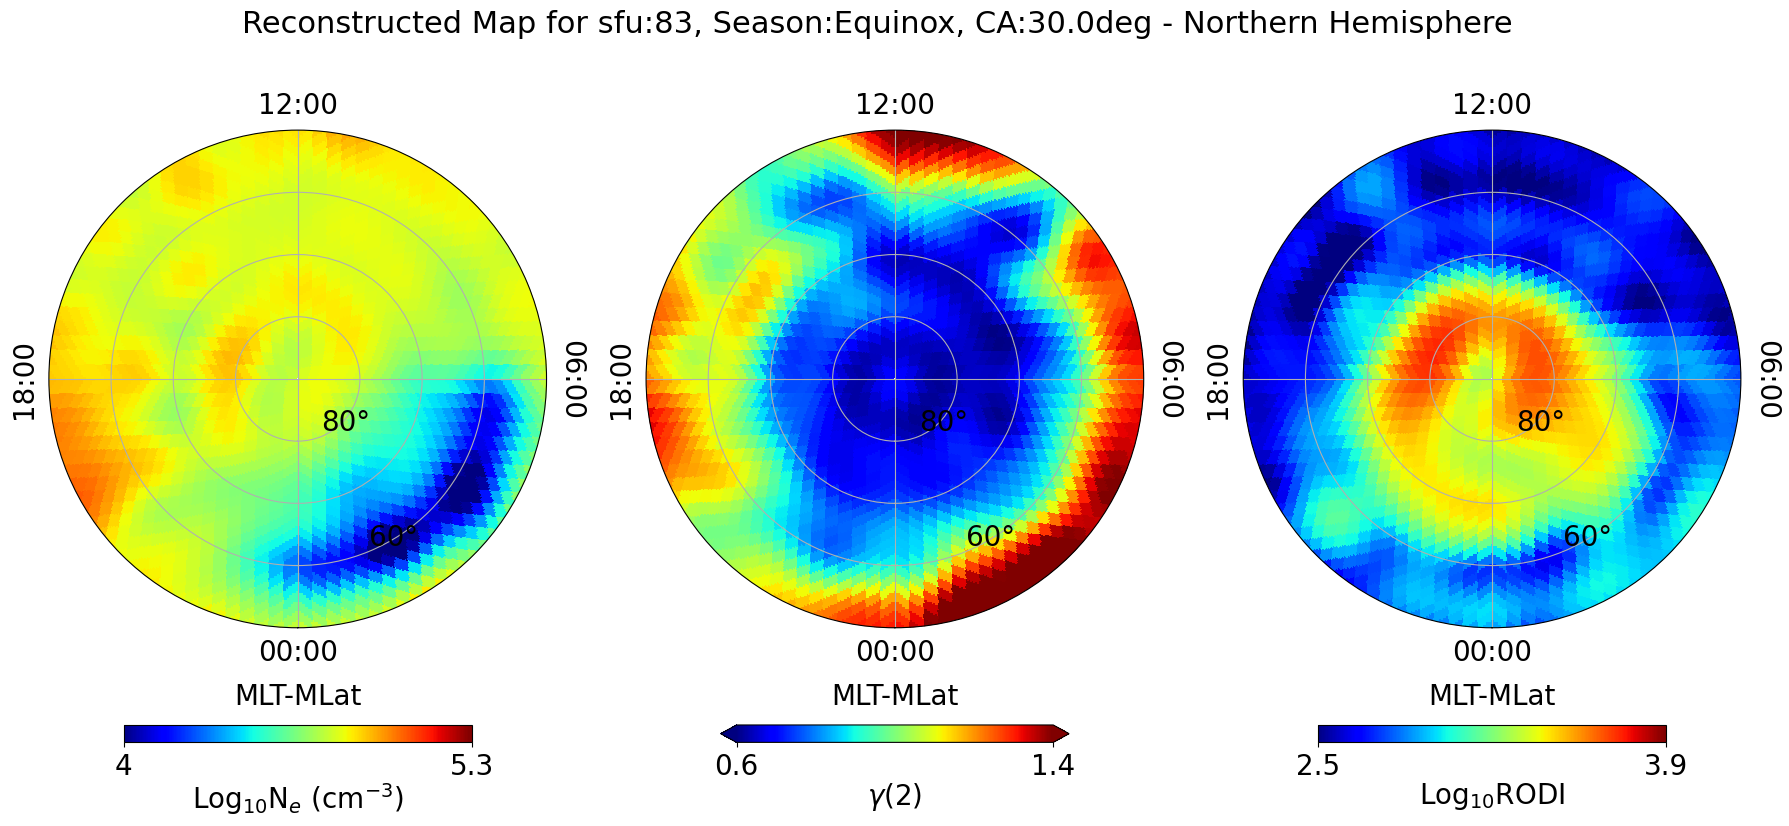

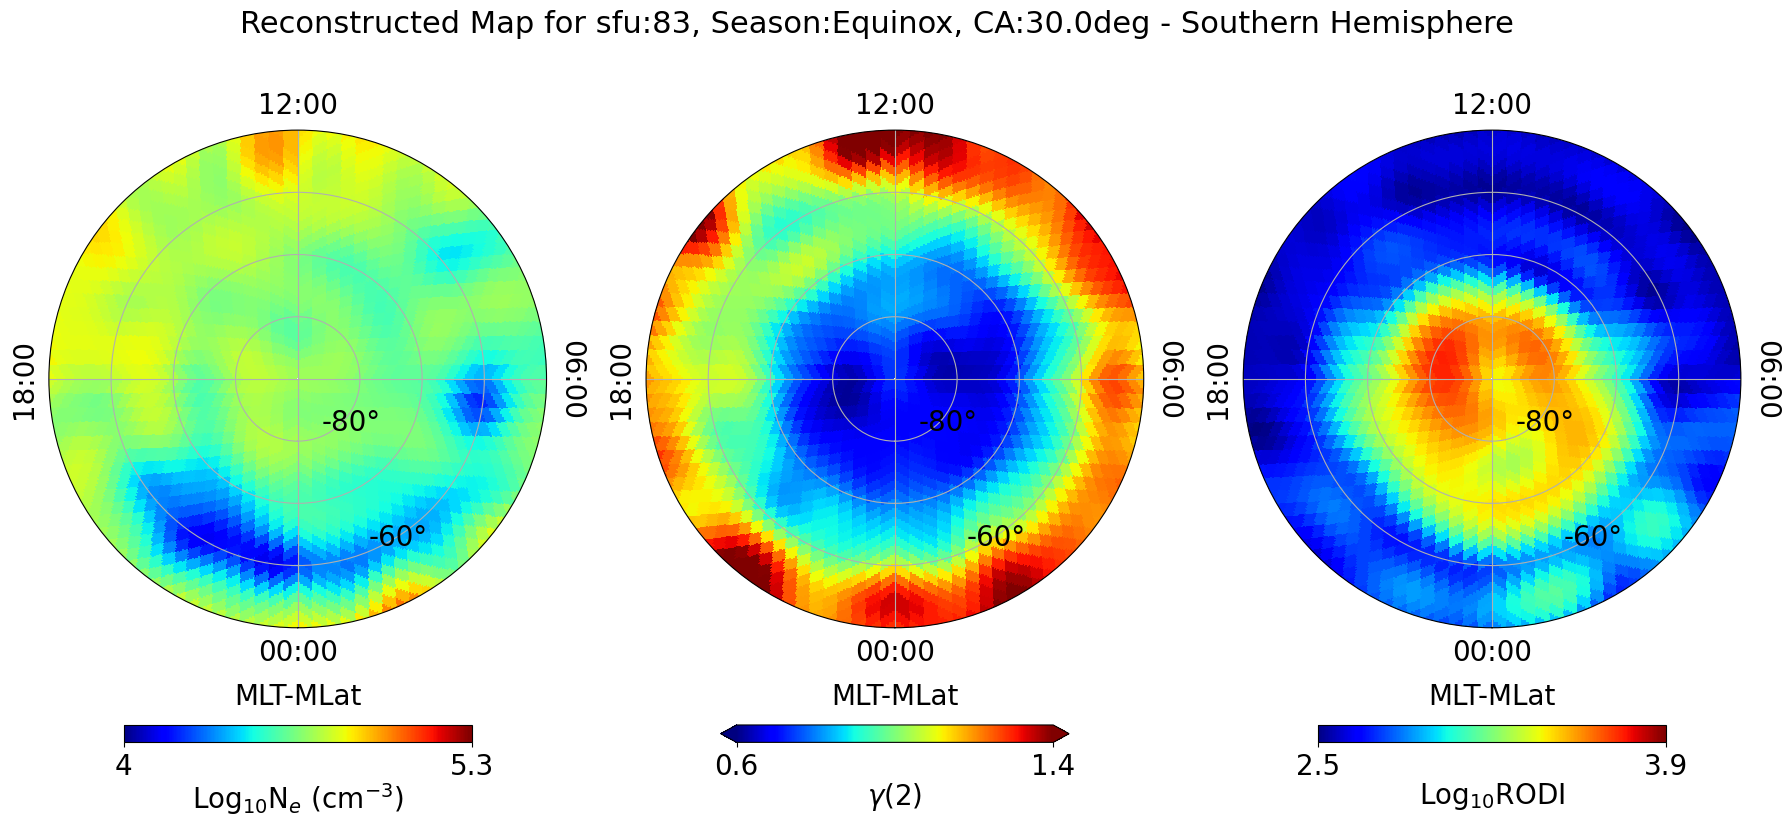

In [13]:
plt.figure(figsize = (18,9))
plt.suptitle(f'Reconstructed Map for sfu:{solar_activity_input}, Season:{season_input}, CA:{round(np.degrees(clock_angle_input),1)}deg - Northern Hemisphere', fontsize=22)

text_radius = np.radians(46)
axis_raidus = np.radians(39)
Axis_raidus = np.radians(35)

vmin_Ne = 0.9*10**4
vmax_Ne = 19*10**4
mapc = 'jet'

map_log_ne = np.log10(reconstructed_map_N_ne)

projview(map_log_ne , coord = ['G'], sub = (1,3,1),  hold = False, graticule = True,  flip = 'geo', phi_convention= 'clockwise',  
         cmap = 'jet', cbar = True, min = round(np.log10(vmin_Ne),1), max = round(np.log10(vmax_Ne),1), graticule_labels = True, unit = 'Log$_{10}$N$_e$ (cm$^{-3}$)', projection_type = 'polar', fontsize = {'cbar_label': 20, 'cbar_tick_label' : 20}, 
         override_plot_properties= {'figure_width':18, 'figure_height':8, 'figure_size_ratio': 0.9,'cbar_pad':0.12, 'cbar_shrink': 0.7})
plt.ylim(np.radians(90), np.radians(50))
plt.yticks(np.radians([80,70,60]), ['80°','', '60°'], fontsize = 20)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 20)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 20)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 20)
plt.text(np.radians(0), axis_raidus , 'MLT-MLat', ha = 'center', va = 'center', fontsize = 20)
plt.gca().set_theta_zero_location('S')

vmin_Ne = 0.6
vmax_Ne = 1.4

projview(reconstructed_map_N_gamma2 , coord = ['G'], sub = (1,3,2), hold = False, graticule = True,  flip = 'geo', phi_convention= 'clockwise',   
         cmap = 'jet', cbar = True, min = vmin_Ne, max = vmax_Ne, graticule_labels = True, unit = '$\\gamma(2)$', projection_type = 'polar', fontsize = {'cbar_label': 20, 'cbar_tick_label' : 20}, 
         override_plot_properties= {'figure_width':18, 'figure_height':8, 'figure_size_ratio': 0.9,'cbar_pad':0.12, 'cbar_shrink': 0.7})
plt.ylim(np.radians(90), np.radians(50))
plt.yticks(np.radians([80,70,60]), ['80°','', '60°'], fontsize = 20)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 20)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 20)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 20)
plt.text(np.radians(0), axis_raidus, 'MLT-MLat', ha = 'center', va = 'center', fontsize = 20)
plt.gca().set_theta_zero_location('S')


vmin_Ne = 350
vmax_Ne = 8000

map_log_rodi = np.log10(reconstructed_map_N_rodi)

projview(map_log_rodi , coord = ['G'], sub = (1,3,3), hold = False, graticule = True,  flip = 'geo', phi_convention= 'clockwise', 
         cmap = 'jet', cbar = True, min = round(np.log10(vmin_Ne),1), max = round(np.log10(vmax_Ne),1), graticule_labels = True, unit = 'Log$_{10}$RODI', projection_type = 'polar', fontsize = {'cbar_label': 20, 'cbar_tick_label' : 20}, 
         override_plot_properties= {'figure_width':18, 'figure_height':8, 'figure_size_ratio': 0.9,'cbar_pad':0.12, 'cbar_shrink': 0.7})
plt.ylim(np.radians(90), np.radians(50))
plt.yticks(np.radians([80,70,60]), ['80°','', '60°'], fontsize = 20)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 20)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 20)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 20)
plt.text(np.radians(0), axis_raidus, 'MLT-MLat', ha = 'center', va = 'center', fontsize = 20)
plt.gca().set_theta_zero_location('S')

plt.show()


plt.figure(figsize = (18,9))
plt.suptitle(f'Reconstructed Map for sfu:{solar_activity_input}, Season:{season_input}, CA:{round(np.degrees(clock_angle_input),1)}deg - Southern Hemisphere', fontsize=22)

text_radius = np.radians(-46)
axis_raidus = np.radians(-39)
Axis_raidus = np.radians(-35)

vmin_Ne = 0.9*10**4
vmax_Ne = 19*10**4
mapc = 'jet'

map_log_ne = np.log10(reconstructed_map_S_ne)

projview(map_log_ne , coord = ['G'], sub = (1,3,1),  hold = False, graticule = True,  flip = 'geo', phi_convention= 'clockwise',  
         cmap = 'jet', cbar = True,  min = round(np.log10(vmin_Ne),1), max = round(np.log10(vmax_Ne),1), graticule_labels = True, unit = 'Log$_{10}$N$_e$ (cm$^{-3}$)', projection_type = 'polar', fontsize = {'cbar_label': 20, 'cbar_tick_label' : 20}, 
         override_plot_properties= {'figure_width':18, 'figure_height':8, 'figure_size_ratio': 0.9,'cbar_pad':0.12, 'cbar_shrink': 0.7})
plt.ylim(np.radians(-90), np.radians(-50))
plt.yticks(np.radians([-80,-70,-60]), ['-80°','', '-60°'], fontsize = 20)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 20)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 20)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 20)
plt.text(np.radians(0), axis_raidus, 'MLT-MLat', ha = 'center', va = 'center', fontsize = 20)
plt.gca().set_theta_zero_location('S')

vmin_Ne = 0.6
vmax_Ne = 1.4

projview(reconstructed_map_S_gamma2 , coord = ['G'], sub = (1,3,2), hold = False, graticule = True,  flip = 'geo', phi_convention= 'clockwise',   
         cmap = 'jet', cbar = True, min = vmin_Ne, max = vmax_Ne, graticule_labels = True, unit = '$\\gamma(2)$', projection_type = 'polar', fontsize = {'cbar_label': 20, 'cbar_tick_label' : 20}, 
         override_plot_properties= {'figure_width':18, 'figure_height':8, 'figure_size_ratio': 0.9,'cbar_pad':0.12, 'cbar_shrink': 0.7})
plt.ylim(np.radians(-90), np.radians(-50))
plt.yticks(np.radians([-80,-70,-60]), ['-80°','', '-60°'], fontsize = 20)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 20)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 20)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 20)
plt.text(np.radians(0), axis_raidus, 'MLT-MLat', ha = 'center', va = 'center', fontsize = 20)
plt.gca().set_theta_zero_location('S')


vmin_Ne = 350
vmax_Ne = 8000


map_log_rodi = np.log10(reconstructed_map_S_rodi)

projview(map_log_rodi , coord = ['G'], sub = (1,3,3), hold = False, graticule = True,  flip = 'geo', phi_convention= 'clockwise',
         cmap = 'jet', cbar = True, min = round(np.log10(vmin_Ne),1), max = round(np.log10(vmax_Ne),1), graticule_labels = True, unit = 'Log$_{10}$RODI', projection_type = 'polar', fontsize = {'cbar_label': 20, 'cbar_tick_label' : 20}, 
         override_plot_properties= {'figure_width':18, 'figure_height':8, 'figure_size_ratio': 0.9,'cbar_pad':0.12, 'cbar_shrink': 0.7})
plt.ylim(np.radians(-90), np.radians(-50))
plt.yticks(np.radians([-80,-70,-60]), ['-80°','', '-60°'], fontsize = 20)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 20)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 20)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 20)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 20)
plt.text(np.radians(0), axis_raidus, 'MLT-MLat', ha = 'center', va = 'center', fontsize = 20)
plt.gca().set_theta_zero_location('S')

plt.show()
